[View in Colaboratory](https://colab.research.google.com/github/anupam3693/eip2/blob/master/Anupam_Kumar_EIP2_Batch2_Assignment_DNST_CIFAR10_AUG.ipynb)

In [0]:
# https://keras.io/
!pip install -q keras
import keras 

In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as k
import numpy as np

In [0]:
# this part will prevent tensorflow to allocate all the avaliable GPU Memory
# backend
import tensorflow as tf
from keras import backend as k

# Don't pre-allocate memory; allocate as-needed
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))

In [0]:
# Hyperparameters
batch_size = 64
num_classes =  10
epochs = 50
l = 40
num_filter = 12
compression = 0.5
dropout_rate = 0


In [0]:
# ak - custimized code block 0

# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
# ak - custimized code block 1 
# code help from https://towardsdatascience.com/image-augmentation-for-deep-learning-using-keras-and-histogram-equalization-9329f6ae5085

# train_picks = np.ravel(np.logical_or(y_train==3,y_train==5))  
# test_picks = np.ravel(np.logical_or(y_test==3,y_test==5))
# y_train = np.array(y_train[train_picks]==5,dtype=int)
# y_test = np.array(y_test[test_picks]==5,dtype=int)
# x_train = x_train[train_picks]
# x_test = x_test[test_picks]

In [0]:
# ak - customized code block 2

# print(x_train.shape)
# print(x_test.shape)

# print(y_train.shape)

# from matplotlib import pyplot as plt
# %matplotlib inline
# plt.imshow(x_train[0])

# img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]

# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255
# print('x_train shape:', x_train.shape)
# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')



In [0]:
# Load CIFAR10 Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]

# convert to one hot encoding 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


(50000, 32, 32, 3)
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


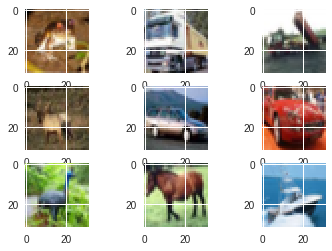

In [54]:
print(x_train.shape)
print(y_train.shape)
print(y_train[0])

from matplotlib import pyplot as plt
%matplotlib inline
# plt.imshow(x_train[30])


#Look at the first 9 images from the dataset
images = range(0,9)
for i in images:
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
    
#Show the plot
plt.show()

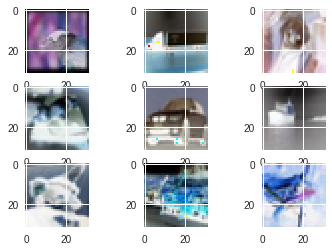

(9, 32, 32, 3)


In [55]:
# ak - customized code block 3

from matplotlib import pyplot

#Input image dimensions
img_rows, img_cols = 32, 32


datagen = ImageDataGenerator(
#         vertical_flip=True,
         horizontal_flip=True
         ,fill_mode='nearest'
)

# parameters tried 
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest'
# datagen = ImageDataGenerator(contrast_stretching=True, adaptive_equalization=True, histogram_equalization=True)


# fit parameters from data
datagen.fit(x_train)

for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(img_height, img_width, 3))
    # show the plot
    pyplot.show()
    break
    
print(X_batch.shape)

In [0]:
# Dense Block
def add_denseblock(input, num_filter , dropout_rate):
  
    #print('Dense Block')
    
    
    global compression
    temp = input
    
    #print('temp')
    #print(temp.shape)
    
    
    for _ in range(l):
      
        #print(_)
        
        BatchNorm = BatchNormalization()(temp)
        
        #print('BatchNorm')
        #print(BatchNorm.shape)
        
        relu = Activation('relu')(BatchNorm)
        
        #print('relu')
        #print(relu.shape)
        
        Conv2D_3_3 = Conv2D(int(num_filter*compression), (3,3), use_bias=False ,padding='same')(relu)
        
        #print('Conv2D_3_3')
        #print(Conv2D_3_3.shape)
        
        if dropout_rate>0:
          Conv2D_3_3 = Dropout(dropout_rate)(Conv2D_3_3)
          
          #print('dropout')
          #print(Conv2D_3_3.shape)
          
        concat = Concatenate(axis=-1)([temp,Conv2D_3_3])
        
        #print('concat')
        #print(concat.shape)
        
        temp = concat
        
    return temp

In [0]:
def add_transition(input, num_filter , dropout_rate ):
    global compression
    
    #print('Transition')
    
    BatchNorm = BatchNormalization()(input)
    
    #print('BatchNorm')
    #print(BatchNorm.shape) 
    
    relu = Activation('relu')(BatchNorm)

    #print('relu')
    #print(relu.shape)
    
    
    Conv2D_BottleNeck = Conv2D(int(num_filter*compression), (1,1), use_bias=False ,padding='same')(relu)
    
    #print('Conv2D_BottleNeck')
    #print(Conv2D_BottleNeck.shape)
    
    if dropout_rate>0:
      Conv2D_BottleNeck = Dropout(dropout_rate)(Conv2D_BottleNeck)
      
      #print('dropout_rate')
      #print(Conv2D_BottleNeck.shape)
      
      
      
    avg = AveragePooling2D(pool_size=(2,2))(Conv2D_BottleNeck)
  
    #print('avg')
    #print(avg.shape)
    
    
    return avg

In [0]:
def output_layer(input):
    global compression
    
    #print('Output Layer')
    
    BatchNorm = BatchNormalization()(input)
    
    #print('BatchNorm')
    #print(BatchNorm.shape)   
    
    relu = Activation('relu')(BatchNorm)
    
    #print('relu')
    #print(relu.shape)
    
    
    AvgPooling = AveragePooling2D(pool_size=(2,2))(relu)
    
    #print('AvgPooling')
    #print(AvgPooling.shape)
    
    flat = Flatten()(AvgPooling)
    
    #print('flat')
    #print(flat)  
    
    output = Dense(num_classes, activation='softmax')(flat)
   
    #print('output')
    #print(output.shape)
    
    
    return output

In [0]:
# num_filter = 12
# dropout_rate = 0.2
# l = 12
input = Input(shape=(img_height, img_width, channel,))
First_Conv2D = Conv2D(num_filter, (3,3), use_bias=False ,padding='same')(input)

First_Block = add_denseblock(First_Conv2D, num_filter, dropout_rate)
First_Transition = add_transition(First_Block, num_filter, dropout_rate)

Second_Block = add_denseblock(First_Transition, num_filter, dropout_rate)
Second_Transition = add_transition(Second_Block, num_filter, dropout_rate)

Third_Block = add_denseblock(Second_Transition, num_filter, dropout_rate)
Third_Transition = add_transition(Third_Block, num_filter, dropout_rate)

Last_Block = add_denseblock(Third_Transition,  num_filter, dropout_rate)
output = output_layer(Last_Block)


In [60]:
model = Model(inputs=[input], outputs=[output])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_165 (Conv2D)             (None, 32, 32, 12)   324         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_165 (BatchN (None, 32, 32, 12)   48          conv2d_165[0][0]                 
__________________________________________________________________________________________________
activation_165 (Activation)     (None, 32, 32, 12)   0           batch_normalization_165[0][0]    
__________________________________________________________________________________________________
conv2d_166

In [0]:
# determine Loss function and Optimizer
sgd = SGD(lr=0.1,decay=10e-4,momentum=0.9)

#sgd = SGD(lr=0.01,clipnorm=1.0, clipvalue=0.5,nesterov=False) #ak - put the learning rate as 0.1
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [65]:
# ak - customized code block 4


model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=300,
                        epochs=50,
                        validation_data=(x_test, y_test))

Epoch 1/50
300/300 [==============================] - 320s 1s/step - loss: 1.3956 - acc: 0.4877 - val_loss: 1.6472 - val_acc: 0.4205
Epoch 2/50
300/300 [==============================] - 320s 1s/step - loss: 1.3346 - acc: 0.5121 - val_loss: 1.4427 - val_acc: 0.4722
Epoch 3/50
300/300 [==============================] - 319s 1s/step - loss: 1.2756 - acc: 0.5366 - val_loss: 1.4085 - val_acc: 0.4968
Epoch 4/50
300/300 [==============================] - 320s 1s/step - loss: 1.2350 - acc: 0.5520 - val_loss: 1.3391 - val_acc: 0.5232
Epoch 5/50
300/300 [==============================] - 319s 1s/step - loss: 1.1818 - acc: 0.5761 - val_loss: 1.3417 - val_acc: 0.5189
Epoch 6/50
300/300 [==============================] - 319s 1s/step - loss: 1.1528 - acc: 0.5859 - val_loss: 1.2541 - val_acc: 0.5475
Epoch 7/50
300/300 [==============================] - 318s 1s/step - loss: 1.1026 - acc: 0.6026 - val_loss: 1.1501 - val_acc: 0.5863
Epoch 8/50
300/300 [==============================] - 319s 1s/step - 

In [0]:
model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

In [66]:
# Test the model
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 64s 6ms/step
Test loss: 0.7367889377593995
Test accuracy: 0.7511


In [67]:
# Save the trained weights in to .h5 format
model.save_weights("DNST_model_epoch50.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
from google.colab import files

files.download('DNST_model_epoch50.h5')